In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import LabelBinarizer

C:\Users\xiaob\anaconda3\envs\project_726\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\xiaob\anaconda3\envs\project_726\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\xiaob\anaconda3\envs\project_726\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\xiaob\anaconda3\envs\project_726\lib\site-pack

In [2]:
import os
p = os.path.abspath(os.getcwd())
p1, _ = os.path.split(p)
datapath, _ = os.path.split(p1)
print(p)
print(p1)
print(datapath)

I:\cmpt-726-project\code\model
I:\cmpt-726-project\code
I:\cmpt-726-project


In [3]:
train_image = pd.read_csv(datapath + '\data\data2\\train.csv')
test_image = pd.read_csv(datapath + '\data\data2\\test.csv')

train_labels = np.array(train_image['label'].values)
train_images = np.array(train_image.drop('label',axis=1).values)

test_labels = np.array(test_image['label'].values)
test_images = np.array(test_image.drop('label',axis=1).values)

In [4]:
train_images = train_images / 255.0
train_images = train_images.reshape(train_images.shape[0], 60, 60, 1)

In [5]:
test_images = test_images / 255.0
test_images = test_images.reshape(test_images.shape[0], 60, 60, 1)

In [6]:
lb = LabelBinarizer()
train_labels = lb.fit_transform(train_labels)
test_labels = lb.fit_transform(test_labels)

In [9]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout

In [11]:
# Build and train neural network
model2 = Sequential([
    Conv2D(128, (5,5), strides=1,padding='same', activation='relu', input_shape=(60,60,1)),
    MaxPool2D(pool_size=(3,3),strides=2,padding='same'),
    Conv2D(64, (2,2), strides=1,padding='same', activation='relu'),
    MaxPool2D(pool_size=(2,2),strides=2,padding='same'),
    Conv2D(32, (2,2), strides=1,padding='same', activation='relu'),
    MaxPool2D(pool_size=(2,2),strides=2,padding='same'),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(rate=0.25),
    Dense(24, activation='softmax')
])

# Compile neural network
model2.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy']
             )

# Train the neural network
model2.fit(train_images, train_labels, epochs=10, validation_data = (test_images,test_labels))

Train on 2845 samples, validate on 569 samples
Epoch 1/10
2845/2845 [==============================] - 13s 4ms/sample - loss: 1.1032 - acc: 0.6668 - val_loss: 0.2291 - val_acc: 0.9367
Epoch 2/10
2845/2845 [==============================] - 13s 5ms/sample - loss: 0.1971 - acc: 0.9329 - val_loss: 0.0561 - val_acc: 0.9824
Epoch 3/10
2845/2845 [==============================] - 14s 5ms/sample - loss: 0.0888 - acc: 0.9701 - val_loss: 0.0475 - val_acc: 0.9842
Epoch 4/10
2845/2845 [==============================] - 13s 5ms/sample - loss: 0.0684 - acc: 0.9754 - val_loss: 0.0205 - val_acc: 0.9947
Epoch 5/10
2845/2845 [==============================] - 14s 5ms/sample - loss: 0.0396 - acc: 0.9870 - val_loss: 0.0081 - val_acc: 1.0000
Epoch 6/10
2845/2845 [==============================] - 13s 5ms/sample - loss: 0.0270 - acc: 0.9916 - val_loss: 0.0049 - val_acc: 1.0000
Epoch 7/10
2845/2845 [==============================] - 14s 5ms/sample - loss: 0.0224 - acc: 0.9933 - val_loss: 0.0016 - val_acc: 1

In [12]:
test_loss2, test_accuracy2 = model2.evaluate(test_images, test_labels)

print('Model 2: Test loss: {}, Test accuracy: {}'.format(test_loss2, (test_accuracy2)*100))

569/569 [==============================] - 1s 1ms/sample - loss: 0.0016 - acc: 1.0000
Model 2: Test loss: 0.001576795893266465, Test accuracy: 100.0


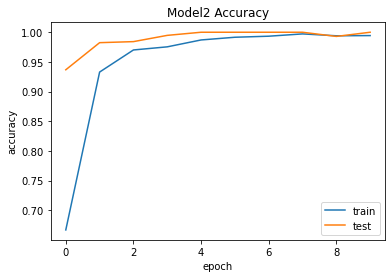

In [13]:
#model 2 test result
plt.plot(model2.history.history['acc'])
plt.plot(model2.history.history['val_acc'])
plt.title("Model2 Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])

plt.show()

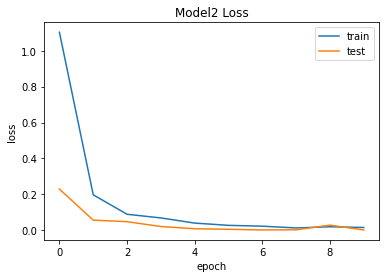

In [14]:
#model 2 test result
plt.plot(model2.history.history['loss'])
plt.plot(model2.history.history['val_loss'])
plt.title("Model2 Loss")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'])

plt.show()